In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
data_train=pd.read_csv("Titanic_train.csv")

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test=pd.read_csv("Titanic_test.csv")

In [5]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
age_mean=data_train['Age'].mean()

In [64]:
data_train['Age'].fillna(age_mean,inplace=True)

In [10]:
cabin_mode=data_train['Cabin'].mode()

In [11]:
cabin_mode

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [12]:
# data_train['Cabin'].fillna(cabin_mode,inplace=True)

In [13]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# data_train['Cabin'].fillna(0)

In [15]:
# data_train['Cabin'].drop

In [16]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [17]:
data_train.describe()  #here we can see the statistics of data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# data_train.drop(['Cabin'],axis=1,inplace=True)  #here we drop unecessary columns

In [20]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [21]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
em=data_train["Embarked"].mode()

In [23]:
data_train['Embarked'].fillna(em)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

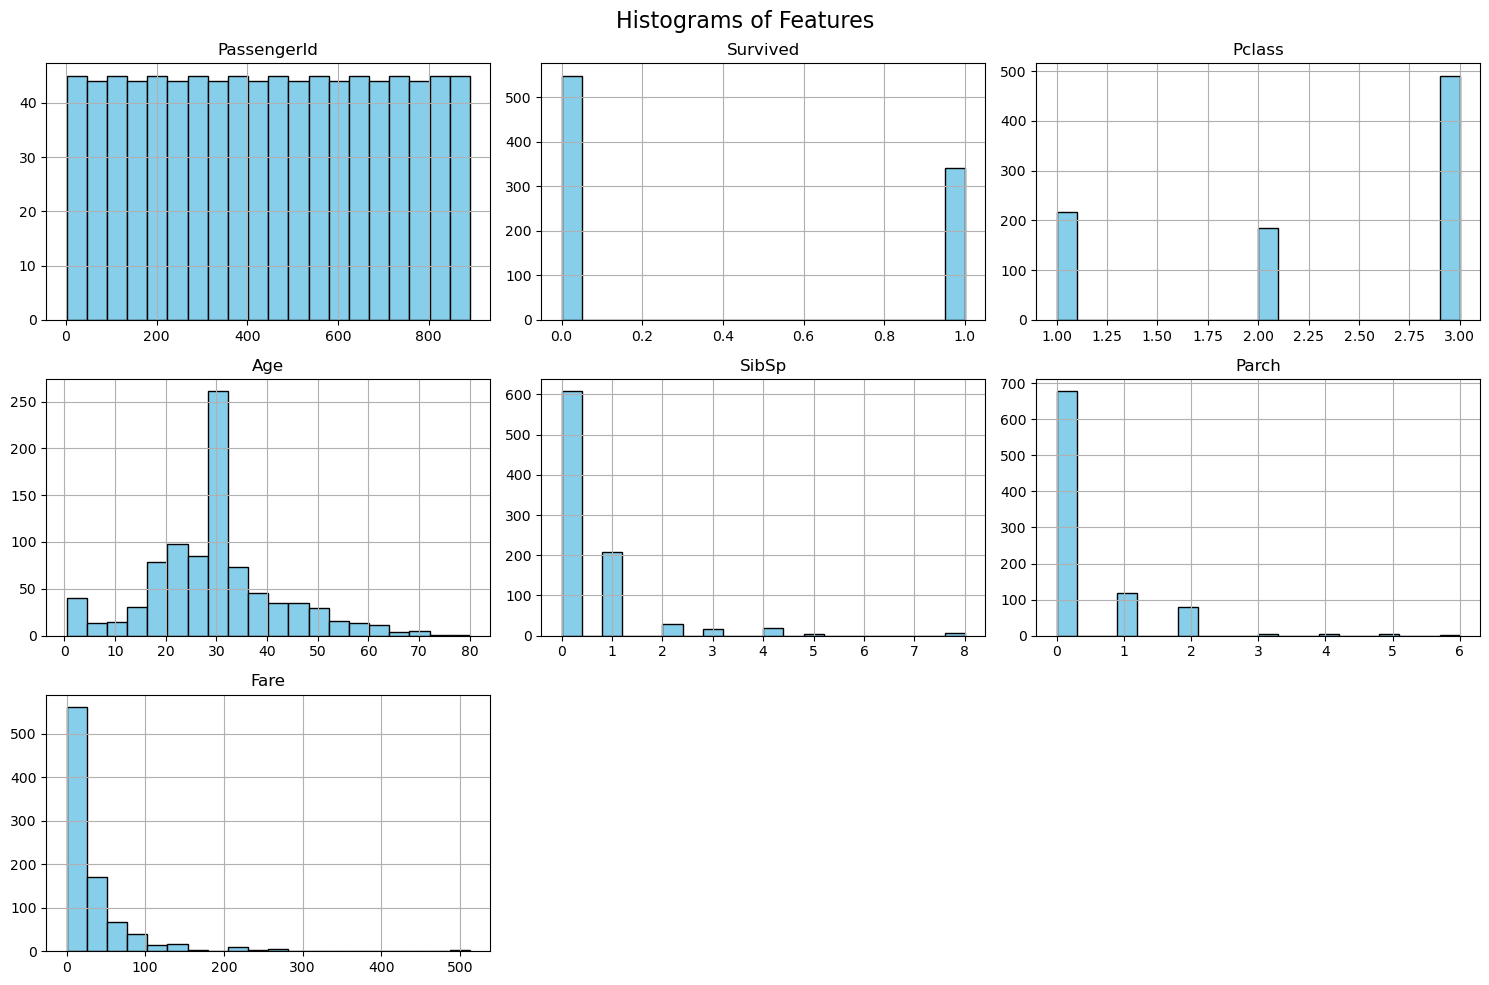

In [24]:
#we done with eda process now we do visulization
# Histograms for numerical features
data_train.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout()
plt.show()

In [25]:
# # Pair plot for relationships
# sns.pairplot(data_train, hue='Survived')  
# plt.suptitle("Pair Plot of Features", y=1.02, fontsize=16)
# plt.show()


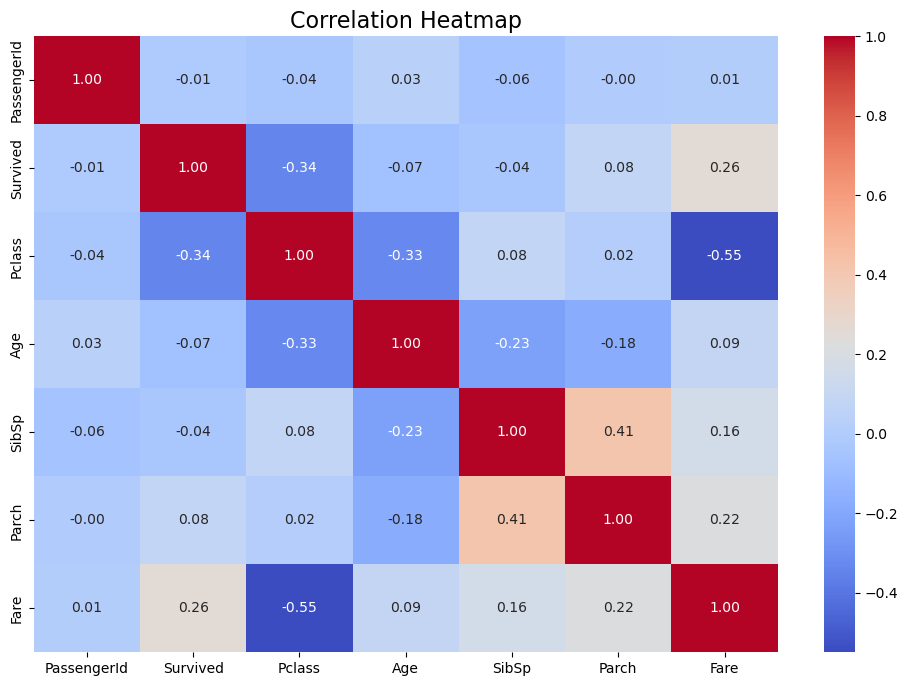

In [26]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_train.select_dtypes(include=['int','float']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

### Data Preprocessing
Handle Missing Values and Encode Categorical Variables

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler   #here we import important packages

In [28]:
#split data into x and y
X=data_train.drop(columns=['Survived'])
y=data_train['Survived']


In [29]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [30]:
# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X.select_dtypes(include='int'))


In [31]:
X

array([[-1.73010796,  0.82737724,  0.43279337, -0.47367361],
       [-1.72622007, -1.56610693,  0.43279337, -0.47367361],
       [-1.72233219,  0.82737724, -0.4745452 , -0.47367361],
       ...,
       [ 1.72233219,  0.82737724,  0.43279337,  2.00893337],
       [ 1.72622007, -1.56610693, -0.4745452 , -0.47367361],
       [ 1.73010796,  0.82737724, -0.4745452 , -0.47367361]])

In [32]:
# Split into training and testing sets (80% training, 20% testing)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

###  Model Building
Train Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model=LogisticRegression()

In [35]:
model

LogisticRegression()

In [36]:
model.fit(X_train,y_train)

LogisticRegression()

### Model Evaluation
Evaluate Model Performance

In [37]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay
)


In [38]:
y_pred_train=model.predict(X_train)  #here we do prediction on seen data

In [39]:
y_pred_train

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,

In [40]:
# Predictions
y_pred_test = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


In [41]:
y_pred_test
y_pred_prob

array([0.6645708 , 0.31458507, 0.42437389, 0.26889654, 0.36636555,
       0.69059617, 0.26522701, 0.24461829, 0.24961319, 0.25537925,
       0.24620412, 0.23977578, 0.42346517, 0.43383785, 0.2581619 ,
       0.22718919, 0.26871458, 0.24380663, 0.63063189, 0.61091137,
       0.27149796, 0.25590776, 0.42459569, 0.63326965, 0.25130772,
       0.45681127, 0.24775373, 0.25949389, 0.26635616, 0.25976082,
       0.27757883, 0.26694453, 0.61809781, 0.24393467, 0.4346339 ,
       0.26984934, 0.38322584, 0.62044007, 0.30567598, 0.71101702,
       0.26540747, 0.2415946 , 0.25335997, 0.26360642, 0.25450001,
       0.27319503, 0.59735543, 0.43850516, 0.63836088, 0.63846346,
       0.26038436, 0.26921516, 0.63444707, 0.36636985, 0.42629732,
       0.25705873, 0.59300579, 0.62539144, 0.51027283, 0.25300987,
       0.23788544, 0.5949594 , 0.2223129 , 0.25581963, 0.23809229,
       0.60401716, 0.27314907, 0.43702406, 0.246508  , 0.2695796 ,
       0.26477621, 0.64363361, 0.45474915, 0.27356283, 0.61481

In [42]:
# Metrics see the model perfomance using the matrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [43]:
accuracy,precision,recall,f1,roc_auc

(0.7318435754189944,
 0.6590909090909091,
 0.46774193548387094,
 0.5471698113207547,
 0.7631651502619243)

In [44]:
accuracy = accuracy_score(y_train,y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
# roc_auc = roc_auc_score(y_test, y_pred_prob)

In [45]:
accuracy,precision,recall,f1  

(0.6811797752808989,
 0.6358974358974359,
 0.44285714285714284,
 0.5221052631578947)

In [46]:
#we can see the accuracy of traning and testing data model give accuracy by looking accuracy we can say model is underfiting

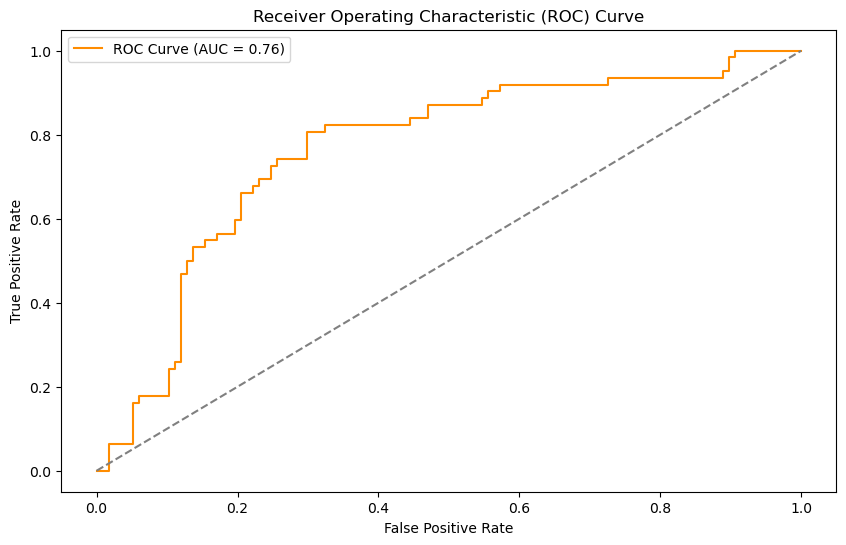

In [47]:

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

### Interpretation of Coefficients

In [53]:
# Coefficients of the logistic regression model
# coefficients = pd.DataFrame({
#     "Feature": data_train.drop(columns=['Survived']).columns,  # Replace 'target' with your target column
#     "Coefficient": model.coef_[0]
# })
# coefficients["Importance"] = coefficients["Coefficient"].abs()
# coefficients.sort_values(by="Importance", ascending=False, inplace=True)

# print("Feature Importance:")
# print(coefficients)

# Logistic Regression Coefficients

print("\nLogistic Regression Coefficients:")
for feature, coef in zip(data_train.columns, model.coef_[0]):
    print(f"{feature}: {coef:.3f}")



Logistic Regression Coefficients:
PassengerId: -0.060
Survived: -0.658
Pclass: -0.110
Name: 0.184


In [ ]:
#we are not done with model deployment

In [58]:
# ! pip install streamlit


In [67]:
# import streamlit as st
# import numpy as np

# st.title("Titanic Survival Predictor")

# st.write("Input the passenger details to predict survival")

# user_input = []
# for feature in data_train.columns:
#     user_input.append(st.number_input(f"Enter value for {feature}:"))

# if st.button("Predict"):
#     user_input = np.array(user_input).reshape(1, -1)
#     user_input_scaled = scaler.transform(user_input)
#     prediction = logistic_model.predict(user_input_scaled)[0]
#     prediction_proba = logistic_model.predict_proba(user_input_scaled)[0][1]

#     st.write(f"Prediction: {'Survived' if prediction == 1 else 'Did Not Survive'}")
#     st.write(f"Probability of Survival: {prediction_proba:.2f}")


### Interview Questions


1. What is the Difference Between Precision and Recall?

Precision: The proportion of true positive predictions out of all positive predictions.
 
Recall (Sensitivity): The proportion of true positive predictions out of all actual positive cases.
 
Trade-off: Higher precision reduces false positives, while higher recall reduces false negatives.


2. What is Cross-Validation, and Why Is It Important in Binary Classification?

Definition: Cross-validation splits the dataset into multiple training and validation sets to evaluate the model's performance.
Why Important?
Reduces overfitting by testing on unseen data.
Provides a more reliable estimate of model performance.
Ensures the model generalizes well.

